In [ ]:
import os
import re
import string
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

!pip install --upgrade pip

#install nltk
!pip install --user -U nltk
import nltk
nltk.download('punkt')

In [2]:
dataframe = pd.read_csv(".\Data\Corona_NLP_test.csv")
dataframe.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,1,44953,NYC,02-03-2020,TRENDING: New Yorkers encounter empty supermar...,Extremely Negative
1,2,44954,"Seattle, WA",02-03-2020,When I couldn't find hand sanitizer at Fred Me...,Positive
2,3,44955,NaN,02-03-2020,Find out how you can protect yourself and love...,Extremely Positive
3,4,44956,Chicagoland,02-03-2020,#Panic buying hits #NewYork City as anxious sh...,Negative
4,5,44957,"Melbourne, Victoria",03-03-2020,#toiletpaper #dunnypaper #coronavirus #coronav...,Neutral


['Extremely Negative' 'Positive' 'Extremely Positive' 'Negative' 'Neutral']
Sentiment
Negative              1041
Positive               947
Neutral                619
Extremely Positive     599
Extremely Negative     592
Name: count, dtype: int64


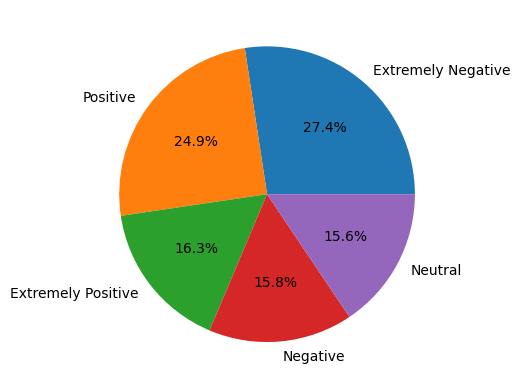

In [3]:
def pie_chart(dataframe):
    
    label_types = dataframe.Sentiment.unique().astype(str)
    label_count = dataframe.Sentiment.value_counts()

    print(label_types)
    print(label_count)

    sizes = [count for count in label_count]

    fig, ax = plt.subplots()
    ax.pie(sizes, labels=label_types, autopct='%1.1f%%')
pie_chart(dataframe)

In [4]:
dataframe[dataframe['Sentiment'] == 'Negative']['OriginalTweet'].shape

(1041,)

In [5]:
dataframe[dataframe['Sentiment'] == 'Positive']['OriginalTweet'].shape

(947,)

In [6]:
import random

all_positive_tweet = list(dataframe[dataframe['Sentiment'] == 'Positive']['OriginalTweet'].astype(str))
all_negative_tweet = list(dataframe[dataframe['Sentiment'] == 'Negative']['OriginalTweet'].astype(str))[:947]  # 

positive_train, positive_test = train_test_split(all_positive_tweet, test_size=0.2, random_state=42)
negative_train, negative_test = train_test_split(all_negative_tweet, test_size=0.2, random_state=42)

print('size of training data : ', len(positive_train) + len(negative_train))
print('size of test data : ', len(positive_test) + len(negative_test))

# print random positive comment
print('\033[92m' + all_positive_tweet[random.randint(0, 947)])
print('\033[91m' + all_negative_tweet[random.randint(0, 947)])

size of training data :  1514
size of test data :  380
Amazon said it needs to hire 100 000 people across the U S to keep up with a crush of orders as the spreads and keeps more people at home shopping online Those interested in applying can learn more about the openings here
or online shopping for someone who can't get out. Love and light to the world and to you of course... As of Saturday night - Eight Canary Islands - 90 total cases confirmed, 1 eighty-one year old sadly died and 7 people already recovered.  https://t.co/jrPE751VKP


Tokenization - Splitting large text samples into words

In [7]:
tweet = all_positive_tweet[12]
word = tweet.split()
print(word)

['Consumers', 'have', 'increased', 'their', 'online', 'shopping', 'due', 'to', 'coronavirus.', 'https://t.co/5mYfz3RAD0', '#retail', '#ecommerce', '#study', '#coronavirus', 'https://t.co/Dz3H6zrWUT']


Regular expression for Email address : ^[a-zA-Z0-9._%±]+@[a-zA-Z0-9.-]+.[a-zA-Z]{2,}$ 

In [8]:
token = re.findall("[\w']+", tweet)
print(token)

['Consumers', 'have', 'increased', 'their', 'online', 'shopping', 'due', 'to', 'coronavirus', 'https', 't', 'co', '5mYfz3RAD0', 'retail', 'ecommerce', 'study', 'coronavirus', 'https', 't', 'co', 'Dz3H6zrWUT']


In [9]:
# using nltk, - wordtokenize

from nltk.tokenize import word_tokenize

word = word_tokenize(tweet)
print(word)

['Consumers', 'have', 'increased', 'their', 'online', 'shopping', 'due', 'to', 'coronavirus', '.', 'https', ':', '//t.co/5mYfz3RAD0', '#', 'retail', '#', 'ecommerce', '#', 'study', '#', 'coronavirus', 'https', ':', '//t.co/Dz3H6zrWUT']


How to Tokenize into a Sentence?

In [10]:
splits = tweet.split('. ')
print(splits)

['Consumers have increased their online shopping due to coronavirus', 'https://t.co/5mYfz3RAD0 #retail #ecommerce #study #coronavirus https://t.co/Dz3H6zrWUT']


In [11]:
#using regular expression

sentence_split = re.compile('[.!?] ').split(tweet)
print(sentence_split)

['Consumers have increased their online shopping due to coronavirus', 'https://t.co/5mYfz3RAD0 #retail #ecommerce #study #coronavirus https://t.co/Dz3H6zrWUT']


In [12]:
# using nltk for sentence_tokenize
from nltk.tokenize import sent_tokenize

sentence = sent_tokenize(tweet)
print(sentence)

['Consumers have increased their online shopping due to coronavirus.', 'https://t.co/5mYfz3RAD0 #retail #ecommerce #study #coronavirus https://t.co/Dz3H6zrWUT']


**Can reduce Dataset size**

In [13]:
import nltk                                    # Python library for NLP
from nltk.corpus import twitter_samples        # Sample twitter dataset from NLTK
from nltk.corpus import stopwords              # Module for stop words that come with nltk
from nltk.stem import PorterStemmer            # module for stemming
from nltk.tokenize import TweetTokenizer

In [14]:
tweet = all_positive_tweet[12]
tweet

'Consumers have increased their online shopping due to coronavirus. https://t.co/5mYfz3RAD0 #retail #ecommerce #study #coronavirus https://t.co/Dz3H6zrWUT'

In [15]:
# Print original tweet in green
print('\033[92m' + tweet)
print('\033[94m')

# Remove old-style retweet
tweet2 = re.sub(r'^RT[\S]+', '', tweet)

# Remove hyperlinks
tweet2 = re.sub(r'(https?:\/\/(?:www\.|(?!www))[a-zA-Z0-9][a-zA-Z0-9-]+[a-zA-Z0-9]\.[^\s]{2,}|www\.[a-zA-Z0-9][a-zA-Z0-9-]+[a-zA-Z0-9]\.[^\s]{2,}|https?:\/\/(?:www\.|(?!www))[a-zA-Z0-9]+\.[^\s]{2,}|www\.[a-zA-Z0-9]+\.[^\s]{2,})', '', tweet2)

# Remove hashtags
tweet2 = re.sub(r'#', '', tweet2)

# Print the cleaned tweet
print(tweet2)

Consumers have increased their online shopping due to coronavirus. https://t.co/5mYfz3RAD0 #retail #ecommerce #study #coronavirus https://t.co/Dz3H6zrWUT

Consumers have increased their online shopping due to coronavirus.  retail ecommerce study coronavirus 


In [16]:

print('\033[92m' + tweet2)
print('\033[94m')

#tweet tokenizer
tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True, reduce_len=True)

tweet_token = tokenizer.tokenize(tweet2)
print(tweet_token)

Consumers have increased their online shopping due to coronavirus.  retail ecommerce study coronavirus 

['consumers', 'have', 'increased', 'their', 'online', 'shopping', 'due', 'to', 'coronavirus', '.', 'retail', 'ecommerce', 'study', 'coronavirus']


In [17]:
#import english stopword 
# nltk.download('stopwords')

stopwords_english = stopwords.words('english')

print("Stop words\n")
print(stopwords_english)

print('\nPunctuation\n')
print(string.punctuation)

Stop words

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so

In [18]:
# removing stopword and punctions

print('\033[92m')
print(tweet_token)

tweet_clean = []

for word in tweet_token:
    if (word not in stopwords_english and word not in string.punctuation):
        tweet_clean.append(word)

print('\033[94m')
print(tweet_clean)


['consumers', 'have', 'increased', 'their', 'online', 'shopping', 'due', 'to', 'coronavirus', '.', 'retail', 'ecommerce', 'study', 'coronavirus']

['consumers', 'increased', 'online', 'shopping', 'due', 'coronavirus', 'retail', 'ecommerce', 'study', 'coronavirus']


**Stemming and Limmatization**

Preprocessing

In [29]:
def text_preprocessing(tweet):
    stemmer = PorterStemmer()
    stopwords_english = stopwords.words('english')

    # Remove old-style retweet
    tweet = re.sub(r'^RT[\S]+', '', tweet)

    # Remove hyperlinks
    tweet = re.sub(r'(https?:\/\/(?:www\.|(?!www))[a-zA-Z0-9][a-zA-Z0-9-]+[a-zA-Z0-9]\.[^\s]{2,}|www\.[a-zA-Z0-9][a-zA-Z0-9-]+[a-zA-Z0-9]\.[^\s]{2,}|https?:\/\/(?:www\.|(?!www))[a-zA-Z0-9]+\.[^\s]{2,}|www\.[a-zA-Z0-9]+\.[^\s]{2,})', '', tweet)

    # Remove hashtags
    tweet = re.sub(r'#', '', tweet)

    # Tweet tokenizer
    tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True, reduce_len=True)
    tweet_token = tokenizer.tokenize(tweet)

    # Removing stopwords and punctuation
    tweet_clean = []

    for word in tweet_token:
        if word not in stopwords_english and word not in string.punctuation:
            tweet_clean.append(stemmer.stem(word))  # Optionally stem the words

    return ' '.join(tweet_clean)  # Join list into a single string


In [30]:
tweet = all_positive_tweet[12]
print('\033[91m')
print(tweet)

processed_tweet = text_preprocessing(tweet)
print('\033[92m')
print(processed_tweet)



Consumers have increased their online shopping due to coronavirus. https://t.co/5mYfz3RAD0 #retail #ecommerce #study #coronavirus https://t.co/Dz3H6zrWUT

consum increas onlin shop due coronaviru retail ecommerc studi coronaviru


### **Building Frequence Dictionary**

In [21]:
def build_freqs(tweets, ys):

    yslist = np.squeeze(ys).tolist()

    freq = {}

    for y, tweet in zip(yslist, tweets):
        for word in text_preprocessing(tweet):
            pair = (word, y)
            if pair in freq:
                freq[pair] += 1
            else:
                freq[pair] = 1

    print(freq)
    return freq



In [39]:
training_tweets = positive_train + negative_train
# for tweet in training_tweets:
#     print(text_preprocessing(tweet))

labels = np.append(np.ones((len(positive_train))), ((np.zeros(len(negative_train)))))

ys = np.squeeze(labels).tolist()
# ys

In [23]:
freqs = build_freqs(training_tweets, labels)


{('time', 1.0): 58, ('others', 1.0): 18, ('lower', 1.0): 5, ('prices', 1.0): 87, ('get', 1.0): 78, ('new', 1.0): 21, ('people', 1.0): 145, ('forthcoming', 1.0): 1, ('recommended', 1.0): 1, ('social', 1.0): 14, ('distancing', 1.0): 6, ('smart', 1.0): 8, ('investment', 1.0): 1, ('long', 1.0): 16, ('run', 1.0): 13, ('covid', 1.0): 562, ('19', 1.0): 218, ('coronaviruspandemic', 1.0): 39, ('_19', 1.0): 290, ('netflix', 1.0): 2, ('primevideo', 1.0): 1, ('retail', 1.0): 72, ('notes', 1.0): 1, ('growth', 1.0): 2, ('demand', 1.0): 28, ('groceries', 1.0): 20, ('canned', 1.0): 17, ('food', 1.0): 250, ('antiseptics', 1.0): 1, ('wuhanvirus', 1.0): 5, ('covd', 1.0): 2, ('current', 1.0): 4, ('dream', 1.0): 2, ('go', 1.0): 49, ('supermarket', 1.0): 104, ('brother', 1.0): 1, ('\x92', 1.0): 217, ('let', 1.0): 16, ('cause', 1.0): 4, ('want', 1.0): 24, ('expose', 1.0): 2, ('risk', 1.0): 10, ('lockdown', 1.0): 16, ('stay', 1.0): 31, ('safe', 1.0): 16, ('amp', 1.0): 19, ('healthy', 1.0): 9, ('take', 1.0): 2

In [40]:
from sklearn.feature_extraction.text import CountVectorizer

for ys, send in zip(ys, training_tweets):
    pair = [text_preprocessing(send), ys]
    # print(pair)

In [9]:
from sklearn.feature_extraction.text import CountVectorizer

# Sample text data
documents = [
    "I love programming",
    "Programming is fun",
    "I love Python"
]

# Initialize CountVectorizer
vectorizer = CountVectorizer(stop_words="english")

# Fit and transform the documents
sparse_matrix = vectorizer.fit_transform(documents)
# print(sparse_matrix)

# Convert sparse matrix to dense matrix
dense_matrix = sparse_matrix.todense()

# Print the dense matrix
print(dense_matrix)

# Print the feature names (vocabulary)
print(vectorizer.get_feature_names_out())


[[0 1 1 0]
 [1 0 1 0]
 [0 1 0 1]]
['fun' 'love' 'programming' 'python']


In [1]:
from nltk.tokenize import RegexpTokenizer

# Example text
text = "Hello, world! This is a test. Let's see how well this tokenizer works: 1, 2, 3, go!"

# Create a RegexpTokenizer instance with a pattern that matches words
# \w+ matches sequences of word characters (letters and digits)
tokenizer = RegexpTokenizer(r'\w+')

# Tokenize the text
tokens = tokenizer.tokenize(text)

print(tokens)


['Hello', 'world', 'This', 'is', 'a', 'test', 'Let', 's', 'see', 'how', 'well', 'this', 'tokenizer', 'works', '1', '2', '3', 'go']
